# INPUT DATA

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
data =[
    {'Khoản mua':'Nguyên vật liệu','SL':10,'Đơn giá':7},
    {'Khoản mua':'Lao động tt(giờ)','SL':5,'Đơn giá':20},
    {'Khoản mua':'Biến phí SXC(giờ)','SL':3,'Đơn giá':5},
    {'Khoản mua':'Định phí SXC(giờ)','SL':3,'Đơn giá':5},
]
df=pd.DataFrame(data)
df

  


,Khoản mua,SL,Đơn giá
0,Nguyên vật liệu,10,7
1,Lao động tt(giờ),5,20
2,Biến phí SXC(giờ),3,5
3,Định phí SXC(giờ),3,5


#1.PHAN TICH TONG QUAN BIEN DONG

In [2]:
#create a column and caculate total
df['Chi phí']=df['SL'] * df['Đơn giá']
df.loc[4]=['Giá thành',0,0,df['Chi phí'].sum()]
df




,Khoản mua,SL,Đơn giá,Chi phí
0,Nguyên vật liệu,10,7,70
1,Lao động tt(giờ),5,20,100
2,Biến phí SXC(giờ),3,5,15
3,Định phí SXC(giờ),3,5,15
4,Giá thành,0,0,200


#2.MỞ RỘNG:Biến động đơn giá Lao động tăng giảm 10% ( bước nhảy 1 đơn vị) thì giá thành ntn?

In [3]:
bang_tam=[]
for j in range(-10,11,1):
    bang_tam.extend([j])
    j=j+1

bang=pd.DataFrame(bang_tam, columns=['Thay đổi(%)'])

bang['Đơn giá của lao động tt(giờ) mới']=df.loc[1,'Đơn giá']*(1+0.01*bang['Thay đổi(%)'])
bang['Chi phí của lao động tt(giờ) mới']=df.loc[1,'SL']*bang['Đơn giá của lao động tt(giờ) mới']
bang['Giá thành mới']=bang['Chi phí của lao động tt(giờ) mới']+df.loc[0,'Chi phí']+df.loc[2,'Chi phí']+df.loc[3,'Chi phí']
bang['Chênh lệch với giá thành gốc(%)']=((bang['Giá thành mới']-200)/200)*100



bang

,Thay đổi(%),Đơn giá của lao động tt(giờ) mới,Chi phí của lao động tt(giờ) mới,Giá thành mới,Chênh lệch với giá thành gốc(%)
0,-10,18.0,90.0,190.0,-5.0
1,-9,18.2,91.0,191.0,-4.5
2,-8,18.4,92.0,192.0,-4.0
3,-7,18.6,93.0,193.0,-3.5
4,-6,18.8,94.0,194.0,-3.0
5,-5,19.0,95.0,195.0,-2.5
6,-4,19.2,96.0,196.0,-2.0
7,-3,19.4,97.0,197.0,-1.5
8,-2,19.6,98.0,198.0,-1.0
9,-1,19.8,99.0,199.0,-0.5


#3.BIỂU ĐỒ ĐƯỜNG

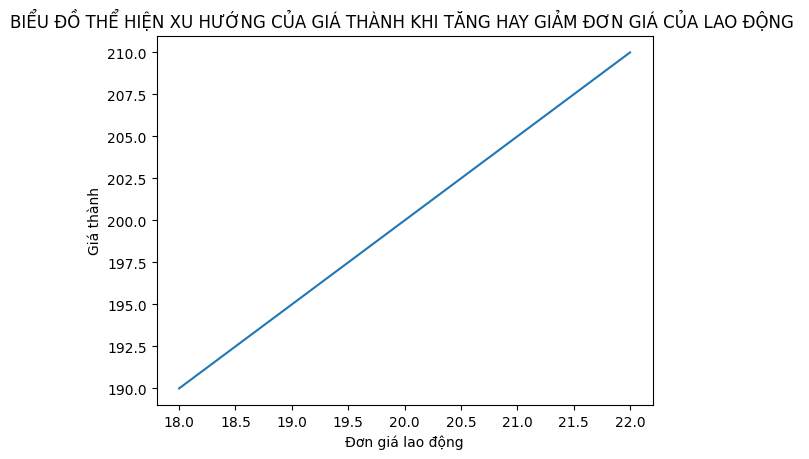

In [4]:
x=bang['Đơn giá của lao động tt(giờ) mới']
y=bang['Giá thành mới']
plt.plot(x,y)
plt.title('BIỂU ĐỒ THỂ HIỆN XU HƯỚNG CỦA GIÁ THÀNH KHI TĂNG HAY GIẢM ĐƠN GIÁ CỦA LAO ĐỘNG ')
plt.xlabel('Đơn giá lao động')
plt.ylabel('Giá thành')
plt.show()

#4.ĐÁNH GIÁ



In [5]:
#Lợi nhuận = Doanh thu - Giá thành
#Giá thành tăng,doanh thu không đổi-->ít lợi nhuận hay bị lỗ nhưng tăng năng suất và cường độ lao động
#Giá thành giảm,doanh thu không đổi-->tăng lợi nhuận nhưng giảm năng suất và cường độ lao động
bang.loc[bang['Chênh lệch với giá thành gốc(%)']>=2.5, 'Đánh giá'] = 'Nguy cơ bị lỗ nhưng có thể làm tăng năng suất lao động'#lạc quan
bang.loc[bang['Chênh lệch với giá thành gốc(%)']<2.5, 'Đánh giá'] = 'Lợi nhuận ít'
bang.loc[bang['Chênh lệch với giá thành gốc(%)']==0, 'Đánh giá'] = 'Bình thường'
bang.loc[bang['Chênh lệch với giá thành gốc(%)']<0, 'Đánh giá'] = 'Lợi nhuận cao'
bang.loc[bang['Chênh lệch với giá thành gốc(%)']<=-2.5, 'Đánh giá'] = 'Lợi nhuận rất cao nhưng nguy cơ làm giảm năng suất lao động'

bang

,Thay đổi(%),Đơn giá của lao động tt(giờ) mới,Chi phí của lao động tt(giờ) mới,Giá thành mới,Chênh lệch với giá thành gốc(%),Đánh giá
0,-10,18.0,90.0,190.0,-5.0,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
1,-9,18.2,91.0,191.0,-4.5,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
2,-8,18.4,92.0,192.0,-4.0,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
3,-7,18.6,93.0,193.0,-3.5,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
4,-6,18.8,94.0,194.0,-3.0,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
5,-5,19.0,95.0,195.0,-2.5,Lợi nhuận rất cao nhưng nguy cơ làm giảm năng ...
6,-4,19.2,96.0,196.0,-2.0,Lợi nhuận cao
7,-3,19.4,97.0,197.0,-1.5,Lợi nhuận cao
8,-2,19.6,98.0,198.0,-1.0,Lợi nhuận cao
9,-1,19.8,99.0,199.0,-0.5,Lợi nhuận cao
